In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.1.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

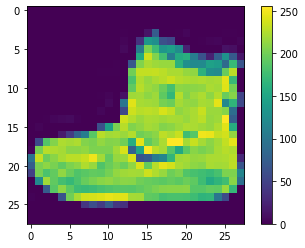

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

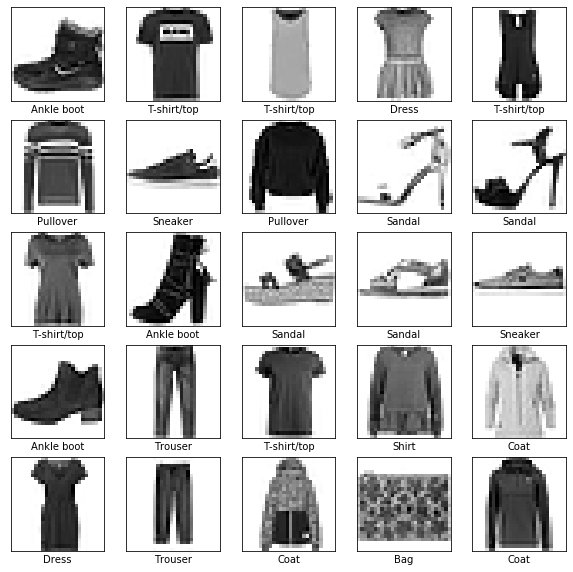

In [18]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [20]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 184us/sample - loss: 0.4981 - accuracy: 0.8258
Epoch 2/10
60000/60000 [==============================] - 12s 202us/sample - loss: 0.3755 - accuracy: 0.8653
Epoch 3/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.3372 - accuracy: 0.8778
Epoch 4/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.3143 - accuracy: 0.8864
Epoch 5/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.2980 - accuracy: 0.8906
Epoch 6/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.2808 - accuracy: 0.8967
Epoch 7/10
60000/60000 [==============================] - 11s 187us/sample - loss: 0.2680 - accuracy: 0.9003
Epoch 8/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.2557 - accuracy: 0.9049
Epoch 9/10
60000/60000 [==============================] - 10s 172us/sample - loss: 0.2481 - accuracy: 0.90

In [22]:
# evaluating accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: ", test_acc)

10000/10000 [==============================] - 1s 111us/sample - loss: 0.3506 - accuracy: 0.8769
Test accuracy:  0.8769


In [23]:
predictions = model.predict(test_images)

In [24]:
predictions[0]

array([4.9252069e-09, 3.9721928e-09, 1.6773894e-09, 3.2385559e-12,
       5.2137064e-09, 1.3247212e-02, 4.0881658e-09, 3.5765585e-03,
       4.6243236e-09, 9.8317623e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [30]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100 * np.max(predictions_array),
                                        class_names[true_label]),
              color = color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
        
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

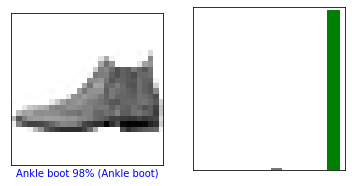

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

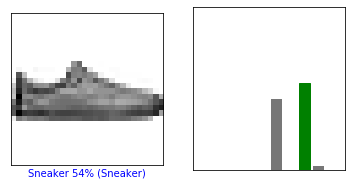

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

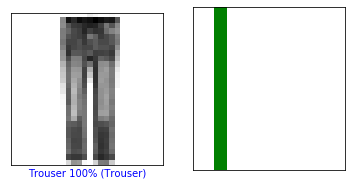

In [33]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

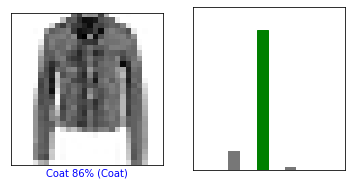

In [34]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

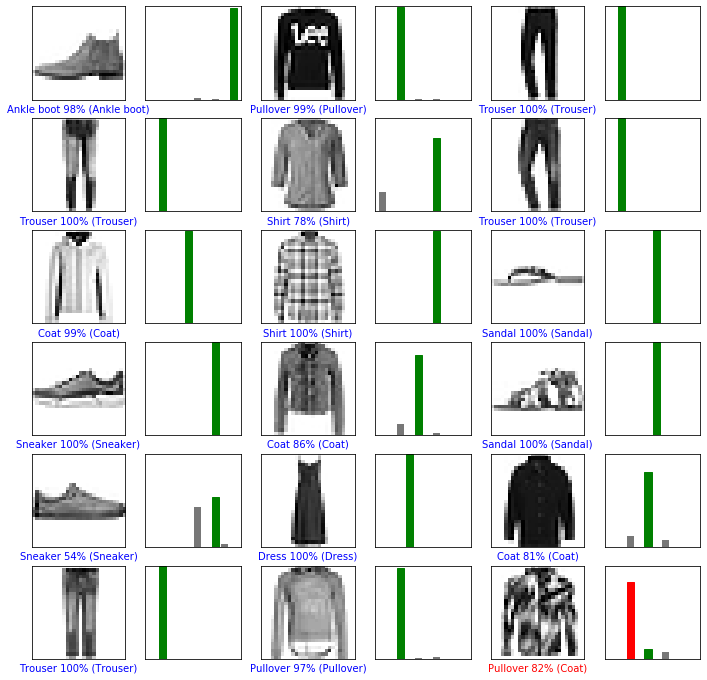

In [37]:
num_rows = 6
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [38]:
img = test_images[0]
print(img.shape)

(28, 28)


In [40]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [41]:
predictions_single = model.predict(img)
print(predictions_single)

[[4.9252158e-09 3.9722003e-09 1.6773894e-09 3.2385622e-12 5.2137064e-09
  1.3247219e-02 4.0881734e-09 3.5765599e-03 4.6243236e-09 9.8317623e-01]]


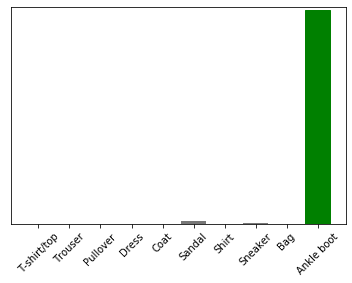

In [42]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [43]:
np.argmax(predictions_single[0])

9

References
- https://www.youtube.com/watch?v=AACPaoDsd50
- https://www.tensorflow.org/tutorials/keras/classification
- https://keras.io/models/about-keras-models/